## SOMMAIRE :
### modélisation par régression :  
a/régression linéaire  
b/KNeighbors   

### modélisation par classification binaire :  
a/régression logistique  
b/linear svm  
c/KNeighbors  

# MODELISATION PAR REGRESSION
(LINEAR REGRESSION & KNN REGRESSOR)

In [1]:
##Chargement des données 
import pandas as pd
pd.set_option('display.max_columns', None)
X_train = pd.read_csv("X_train_enc_st.csv", index_col=0, low_memory=False)
X_test = pd.read_csv("X_test_enc_st.csv",index_col=0, low_memory = False)
y_train = pd.read_csv("y_train_reg.csv",index_col=0, low_memory = False)
y_test = pd.read_csv("y_test_reg.csv",index_col=0, low_memory = False)

In [2]:
#X_test.head()

In [3]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(1233308, 23)

(308327, 23)

(1233308, 1)

(308327, 1)

### LINEAR REGRESSION

#### Instancier le modèle

In [4]:
#Instancier le modèle
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [5]:
#type(y_train)

In [6]:
import numpy as np
y_train.head()

,FirstPumpArriving_AttendanceTime
1054446,354
578197,155
789567,445
163034,266
1508277,524


In [7]:
#Passer y_train au format liste
y_train = y_train.values.ravel()

In [8]:
#Entraîner le modèle
lr.fit(X_train, y_train)

LinearRegression()

#### Coefficients de régression


In [9]:
#Intercept de la droite de régression
intercept = float(lr.intercept_)
print(intercept)

363.0815666561937


In [10]:
#Coefficients de chaque variable
import numpy as np
coeffs = lr.coef_.flatten().tolist()
#coeffs

In [11]:
#Insérer l'intercept dans la liste des coefficients
coeffs.insert(0, intercept)
#coeffs

In [12]:
#Liste des variables avec ajout d'Intercept
var = list(X_train.columns)
var.insert(0,"Intercept")
#var

In [13]:
#Dataframe des coefficients
pd.DataFrame({"coefficients" : coeffs}, index = var).sort_values(by="coefficients", ascending=False)

,coefficients
DeployedFromStation_Name,1513.433089
Intercept,363.081567
StopCodeDescription_Use of Special Operations Room,180.801678
PropertyCategory_Boat,46.851691
PropertyCategory_Outdoor,36.685206
StopCodeDescription_Late Call,28.111917
PropertyCategory_Outdoor Structure,23.888385
PropertyCategory_Road Vehicle,23.471988
PropertyCategory_Dwelling,20.652791
PropertyCategory_Non Residential,18.467328


#### Prédictions

In [14]:
y_pred = lr.predict(X_test)

#### Métriques de performance

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
#display(mean_absolute_error(y_test, y_pred))
#display(mean_squared_error(y_test, y_pred))
#display(np.sqrt(mse))
#display(r2_score(y_test,y_pred))

In [16]:
#Afficher les métriques de performance en dataframe
scores = pd.DataFrame.from_dict({"mean_absolute_error" : [mae], 
                               "mean_squared_error" : [mse],
                               "root_mean_squared_error" : [rmse],
                               "R^2" : [r2]})
scores = scores.T
scores= scores.rename(columns = {0:"scores"})
scores

,scores
mean_absolute_error,89.719590
mean_squared_error,14049.171200
root_mean_squared_error,118.529200
R^2,0.051449


#### Nuage de points entre y_pred et y_test :

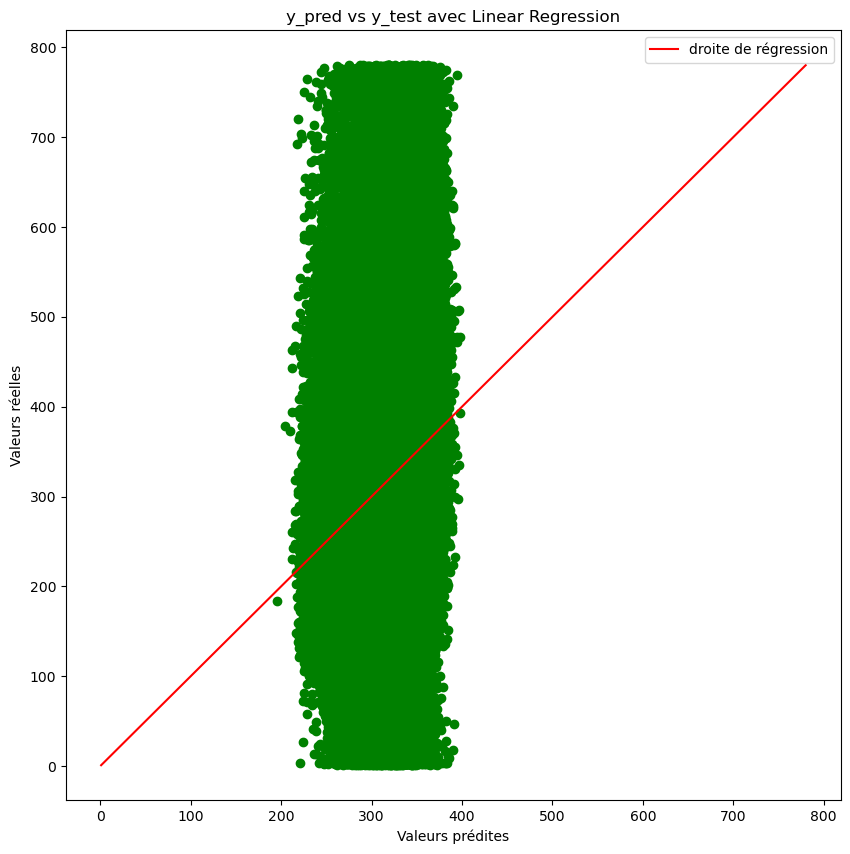

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
plt.scatter(y_pred, y_test, c = 'green')
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.title("y_pred vs y_test avec Linear Regression")

#Ajouter la droite de régression de référence ;
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red', label='droite de régression')
plt.legend()
plt.show()

## KNeighborsRegressor 

#### Instancier le modèle

In [18]:
# Instancier le modèle
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [19]:
print(X_train.shape)
print(y_train.shape)

(1233308, 23)
(1233308,)


#### CHOIX DES PARAMETRES

In [20]:
# Convertir y_train en pandas.Series
y_train = pd.Series(y_train)

In [21]:
# Utiliser un échantillon de données plus petit (par exemple 10%)
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.sample(frac=0.1, random_state=42)

# Appliquer GridSearchCV sur cet échantillon

from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [5, 10, 15]}  # Limiter la recherche à quelques valeurs
knr = KNeighborsRegressor(metric = 'minkowski')
grid_knr = GridSearchCV(estimator=knr, param_grid=parameters, cv=3)  # Validation croisée à 3 plis
grid_knr.fit(X_train_sample, y_train_sample)

# Résultats de GridSearch : obtenir les meilleurs paramètres et résultats
best_params = grid_knr.best_params_  # Meilleur n_neighbors
best_score = grid_knr.best_score_    # Meilleur score moyen

In [22]:
print("Meilleur paramètre n_neighbors :", best_params)
#display(best_score)

Meilleur paramètre n_neighbors : {'n_neighbors': 15}


In [23]:
display(best_params)
display(best_score)

{'n_neighbors': 15}

-0.0269280153652293

#### Prédictions

In [32]:
y_pred = grid_knr.predict(X_test)

#### Métriques de performance

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

scores = pd.DataFrame.from_dict({"mean_squared_error": [mse],
                              "mean_absolute_error":[mae],
                              "root_mean_squared_error ": [rmse],
                              "r2": [r2]})
scores = scores.T
scores = scores.rename(columns = {0 : "scores"})
scores

,scores
mean_squared_error,15144.089260
mean_absolute_error,94.106070
root_mean_squared_error,123.061323
r2,-0.022476


#### Représentation graphique

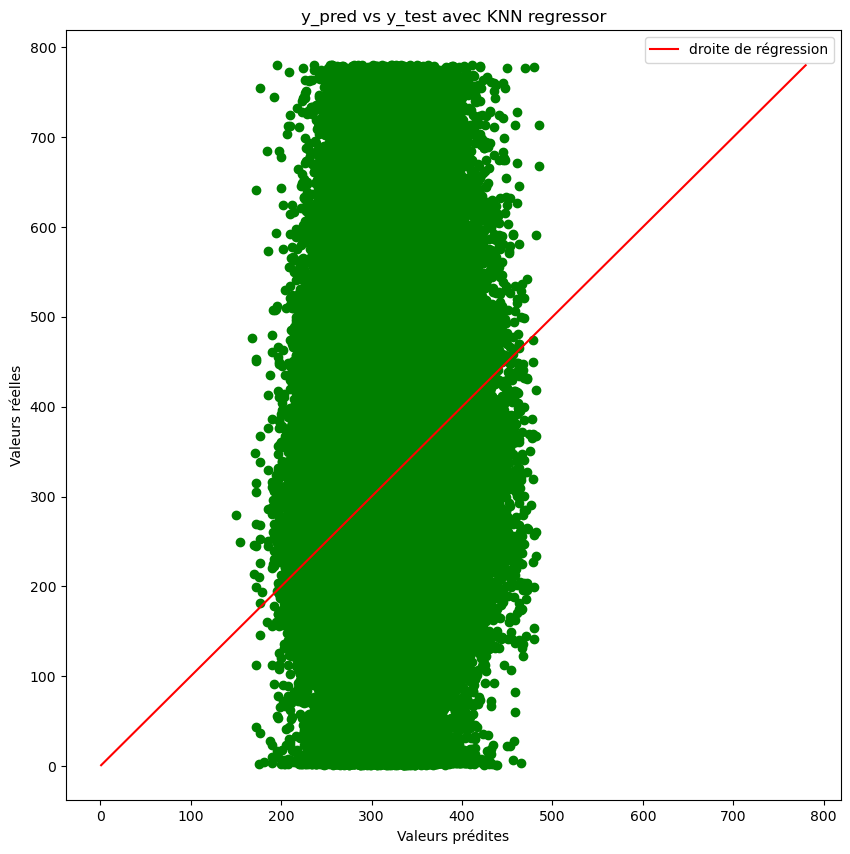

In [38]:
# Représentation graphique de y_pred et y_test
fig = plt.figure(figsize = (10,10))
plt.scatter(y_pred, y_test, c = 'green')
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.title("y_pred vs y_test avec KNN regressor")

#Ajouter la droite de régression de référence ;
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red', label='droite de régression')
plt.legend()
plt.show()

# MODELISATION CLASSIFICATION BINAIRE

In [39]:
##Chargement des données 
import pandas as pd
pd.set_option('display.max_columns', None)
X_train = pd.read_csv("X_train_enc_st.csv", index_col=0, low_memory=False)
X_test = pd.read_csv("X_test_enc_st.csv",index_col=0, low_memory = False)
y_train = pd.read_csv("y_train_bi.csv",index_col=0, low_memory = False)
y_test = pd.read_csv("y_test_bi.csv",index_col=0, low_memory = False)

In [40]:
#Réindexation de y_train et y_test
y_test = y_test.reset_index(drop=True)
y_test.head()

,attendance_time_inf_6min
0,1
1,1
2,1
3,0
4,1


In [41]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(1233308, 23)

(308327, 23)

(1233308, 1)

(308327, 1)

## REGRESSION LOGISTIQUE

##### INSTANCIATION

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 5000)

In [43]:
y_train = y_train.values.ravel()

In [44]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

##### PREDICTIONS

In [45]:
#Afficher les valeurs prédites obtenues par le modèle
y_pred = clf.predict(X_test)

In [46]:
y_pred = y_pred.ravel()
y_test = y_test.values.ravel()

In [47]:
#Afficher les valeurs prédites en %
probs = clf.predict_proba(X_test)
probs = pd.DataFrame(probs)

##### MATRICE DE CONFUSION

In [48]:
cm = pd.crosstab(y_test, y_pred, rownames = ["classes réelles"],
                colnames = ["classes prédites"])
cm

classes prédites,0,1
classes réelles,,
0,50,88976
1,42,219259


##### SCORES

In [82]:
#Evaluer le modèle avec Accuracy
score_train = clf.score(X_train, y_train)
display(score_train)
score_test = clf.score(X_test, y_test)
display(score_test)
print("Accuracy sur le jeu d'entraînement :", score_train,"\nAccuracy sur le jeu test :", score_test)
print("Il n'y a pas d'overfitting apparent")

0.7111313637793641

0.7115821838502628

Accuracy sur le jeu d'entraînement : 0.7111313637793641 
Accuracy sur le jeu test : 0.7115821838502628
Il n'y a pas d'overfitting apparent


In [83]:
#Afficher le classification_report :
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.13      0.19     89026
           1       0.72      0.93      0.81    219301

    accuracy                           0.70    308327
   macro avg       0.57      0.53      0.50    308327
weighted avg       0.63      0.70      0.63    308327



##### COEFFICIENTS

In [84]:
#Afficher la constante et le coefficient
intercept = clf.intercept_
print(intercept)

[0.21885625]


In [85]:
features_name = X_test.columns
import numpy as np
coefs = list(clf.coef_[0])
coefs.insert(0, intercept)
coefs = list(coefs)
var = list(X_train.columns)
var.insert(0,"Intercept")
pd.DataFrame({"coefficients" : coefs}, index = var).sort_values(by="coefficients", ascending=False)

,coefficients
Easting_rounded,67.883385
Northing_rounded,41.81162
Intercept,[0.21885625016167923]
Visibility_encoded,0.147116
Hour,0.031543
PropertyCategory_Rail Vehicle,0.018215
Meteo_encoded,0.004314
Year,0.000415
StopCodeDescription_Primary Fire,-0.025259
StopCodeDescription_False alarm - Malicious,-0.041873


##### COURBE ROC

In [55]:
from sklearn.metrics import roc_curve, auc
y_test = y_test.ravel()

In [56]:
#Appliquer la fonction roc_curve à y_test et à la 2° colonne de probs(classe 1)
fpr, tpr, seuils = roc_curve(y_test, probs[1], pos_label = 1) 

In [57]:
#Calculer l'AUC correspondant aux valeurs de fpr et tpr
roc_auc = auc(fpr, tpr) 

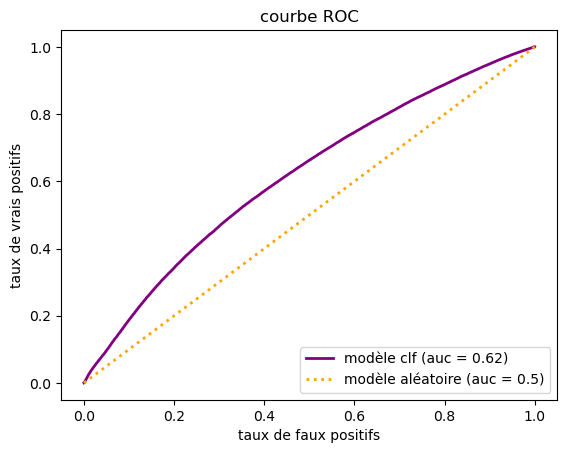

In [58]:
#Créer une reproduction graphique des variables, fpr, tpr, et roc_auc
import seaborn as sns
import matplotlib.pyplot as plt
#sns.kdeplot(fpr, color = 'green', fill = True)
#sns.kdeplot(tpr, color = 'purple')
plt.plot(fpr, tpr, 
         color = 'purple',
         linewidth = 2, 
         label = "modèle clf (auc = %0.2f)"%roc_auc)
plt.plot([0,1], [0,1], 
         color ='orange', 
         linestyle = ':',
         linewidth = 2,
         label ="modèle aléatoire (auc = 0.5)")
plt.xlabel("taux de faux positifs")
plt.ylabel("taux de vrais positifs")
plt.title("courbe ROC")
plt.legend(loc = 'lower right')
plt.show();

## LINEAR SVM

#### INSTANCIATION

In [59]:
#Instancier
from sklearn.svm import LinearSVC
clf = LinearSVC()

In [61]:
#Conversion de y_train en 1D
y_train = y_train.ravel()

In [62]:
#Entraîner
clf.fit(X_train, y_train)

LinearSVC()

#### PREDICTIONS

In [63]:
#Afficher les prédictions obtenues
y_pred = clf.predict(X_test)

In [65]:
#Convertir y_test en 1D
y_test = y_test.ravel()
#Convertir y_pred en 1D
y_pred = y_pred.ravel()

In [66]:
#Afficher la matrice de confusion
cm = pd.crosstab(y_test, y_pred, rownames = ["valeurs réelles"], colnames = ["valeurs prédites"])
cm

valeurs prédites,0,1
valeurs réelles,,
0,334,88692
1,235,219066


#### SCORES

In [67]:
#Evaluer le modèle avec Accuracy
print("Score accuracy sur le jeu d'entraînement :", clf.score(X_train, y_train))
print("Score accuracy sur le jeu test :",clf.score(X_test, y_test))
print("Il n'y a pas d'overfitting")

Score accuracy sur le jeu d'entraînement : 0.7111313637793641
Score accuracy sur le jeu test : 0.7115821838502628
Il n'y a pas d'overfitting


In [68]:
#Rapport de classification
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.00      0.01     89026
           1       0.71      1.00      0.83    219301

    accuracy                           0.71    308327
   macro avg       0.65      0.50      0.42    308327
weighted avg       0.68      0.71      0.59    308327



## KNN CLASSIFIEUR

In [69]:
#Instanciation
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier(n_neighbors = 15, n_jobs=-1)

In [71]:
# Utiliser un échantillon de données plus petit (par exemple 10%)
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train)

# Échantillonnage de 1% des données avec les mêmes indices
sample_indices = X_train.sample(frac=0.01, random_state=42).index
X_train_sample = X_train.loc[sample_indices]
y_train_sample = y_train.loc[sample_indices]

In [72]:
#Conversion de y_train en 1D
y_train = y_train.values.ravel()

In [73]:
#Entraîner le classifieur sur le jeu d'entraînement
clf3.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=15)

#### PREDICTIONS

In [74]:
#Afficher les prédictions obtenues 
y_pred = clf3.predict(X_test)

In [76]:
y_test = y_test.ravel()

In [77]:
#Afficher la matrice de confusion
cm = pd.crosstab(y_test, y_pred, rownames = ["classe réelle"], colnames=["classe prédite"])
cm

classe prédite,0,1
classe réelle,,
0,11178,77848
1,15835,203466


#### OPTIMISATION DES HYPERPARAMETRES

In [78]:
#Avec n_neighbors = 5 et metrice = 'manhattan'
clf3_m = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')

In [79]:
#Convertir y en 1D
y_train = y_train.ravel()

In [80]:
#Entraîner le nouveau modèle :
clf3_m.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

#### SCORES

In [81]:
#Afficher le classification_report :
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.13      0.19     89026
           1       0.72      0.93      0.81    219301

    accuracy                           0.70    308327
   macro avg       0.57      0.53      0.50    308327
weighted avg       0.63      0.70      0.63    308327

